In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України")
table = tables[0]

table = table.replace('—',  np.nan)
numeric_columns = table.columns[1:]
table[numeric_columns] = table[numeric_columns].astype(float) / 10

print(table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [20]:
print(table.shape)

(28, 9)


In [21]:
df = table.replace('—', np.nan)
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [22]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [23]:
non_numeric_columns = df.columns[df.dtypes == object][1:]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce').astype('float')
print("\nReplace non-numeric columns with numeric ones:")
print(df[non_numeric_columns].dtypes)


Replace non-numeric columns with numeric ones:
Series([], dtype: object)


In [24]:
data = df.iloc[:, 1:]
missing_percentage = (data.isnull().sum() / len(data) * 100).round(2)
print("\nPercentage of missing values in each column (excluding the first one):")
print(missing_percentage)


Percentage of missing values in each column (excluding the first one):
1950     7.14
1960     3.57
1970     3.57
1990     0.00
2000     0.00
2012     0.00
2014     7.14
2019    14.29
dtype: float64


In [25]:
table_without_last = table.iloc[:-1]

print("\nTable without the last row:")
print(table_without_last)


Table without the last row:
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11

In [26]:
first_column = table.iloc[:, 0]
last_row = table.iloc[-1]

table_without_first_col_last_row = table.iloc[:-1, 1:]
table_without_first_col_last_row = table_without_first_col_last_row.apply(pd.to_numeric, errors='coerce')
table_without_first_col_last_row.fillna(table_without_first_col_last_row.mean(), inplace=True)

table_processed = pd.concat([first_column.iloc[:-1].reset_index(drop=True), table_without_first_col_last_row], axis=1)
table_processed = table_processed.round(1)
table = pd.concat([table_processed, last_row.to_frame().T], ignore_index=True)


print("\nTable with replaced missing values:")
# print(table_processed)
print(table)


Table with replaced missing values:
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  

In [27]:
regions = table.iloc[:-1, 0]
birth_rate_2019 = pd.to_numeric(table['2019'][:-1], errors='coerce')
average_birth_rate_ukraine_2019 = birth_rate_2019.mean()
regions_birth_rate_2019 = pd.DataFrame({'Region': regions, 'Birth Rate 2019': birth_rate_2019})
regions_above_average = regions_birth_rate_2019[regions_birth_rate_2019['Birth Rate 2019'] > average_birth_rate_ukraine_2019]

print("\nRegions with birth rate in 2019 higher than the average for Ukraine:")
print(regions_above_average)


Regions with birth rate in 2019 higher than the average for Ukraine:
               Region  Birth Rate 2019
2           Волинська             10.1
6        Закарпатська             10.4
8   Івано-Франківська              8.8
12          Львівська              8.7
14            Одеська              8.8
16         Рівненська             10.7
20         Херсонська              8.1
23        Чернівецька              9.2
25               Київ             11.0


In [28]:
regions = table.iloc[:-1, 0]
table['2014'] = pd.to_numeric(table['2014'], errors='coerce')
highest_birth_rate_index = table['2014'].idxmax()

region_highest_birth_rate = table.loc[highest_birth_rate_index, 'Регіон']
highest_birth_rate_value = table.loc[highest_birth_rate_index, '2014']

print("The region with the highest birth rate in 2014:", region_highest_birth_rate)
print("Birth rate in 2014:", highest_birth_rate_value)

The region with the highest birth rate in 2014: Рівненська
Birth rate in 2014: 14.8


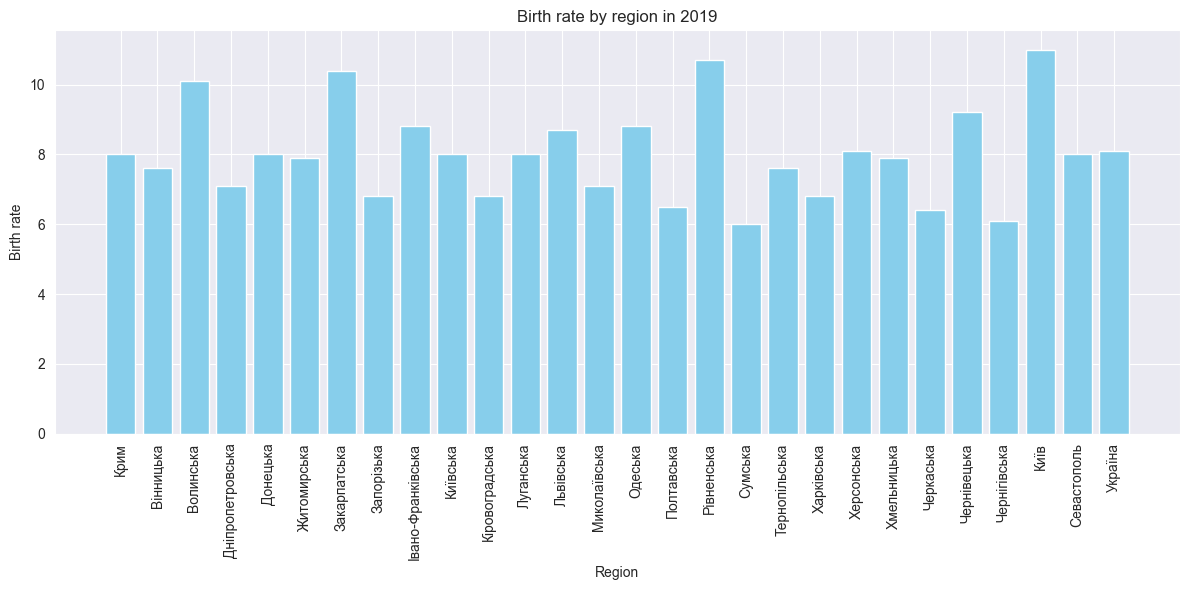

In [29]:
table['2019'] = pd.to_numeric(table['2019'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.bar(table['Регіон'], table['2019'], color='skyblue')
plt.title('Birth rate by region in 2019')
plt.xlabel('Region')
plt.ylabel('Birth rate')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

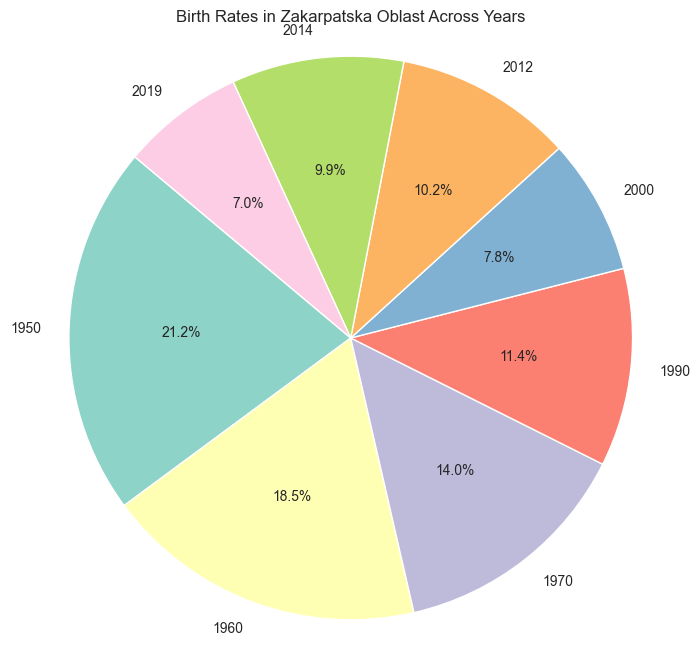

In [30]:
df = pd.DataFrame(table).set_index('Регіон') 
numeric_df = df.apply(pd.to_numeric, errors='coerce') 

data = numeric_df.loc['Закарпатська'].dropna()

plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Set3", len(data)))

plt.title('Birth Rates in Zakarpatska Oblast Across Years')
plt.axis('equal')
plt.show()

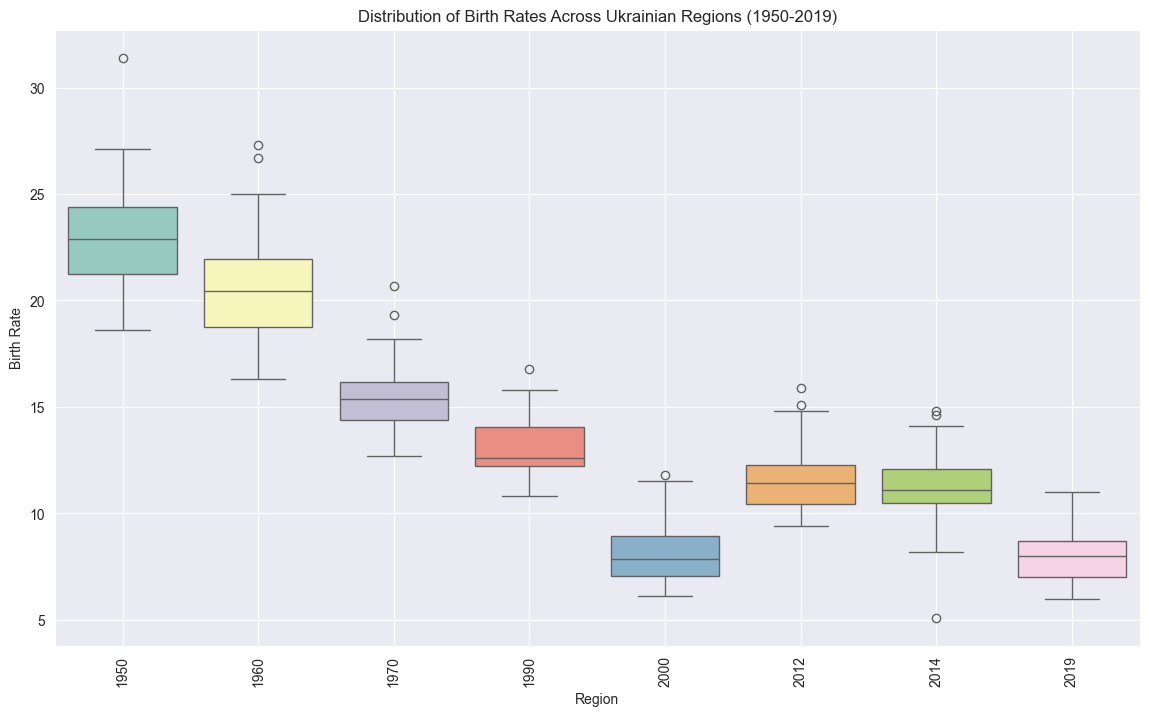

In [31]:
df = pd.DataFrame(table)
df.set_index('Регіон', inplace=True)
numeric_df = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(14, 8))
sns.boxplot(data=numeric_df, palette='Set3')
plt.title('Distribution of Birth Rates Across Ukrainian Regions (1950-2019)')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

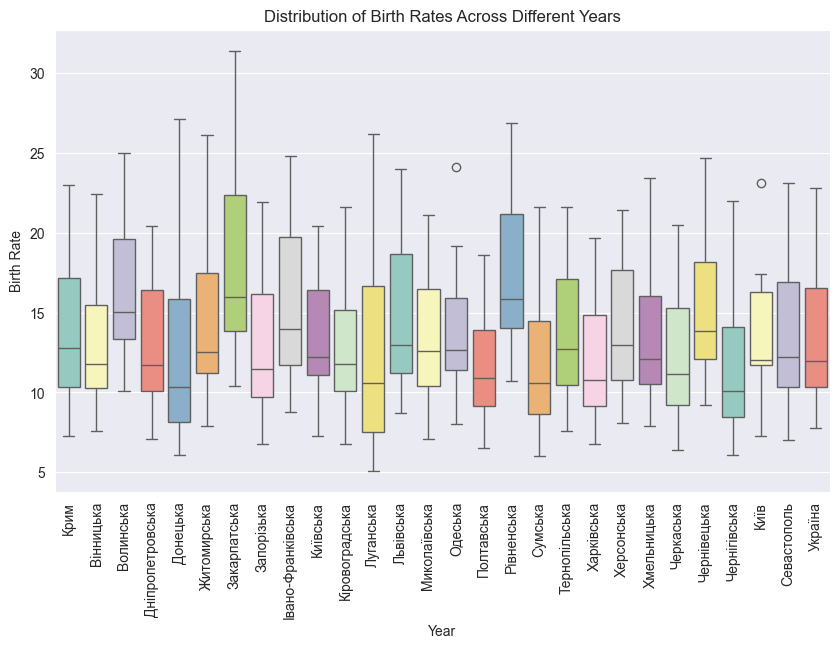

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df.T, palette='Set3')
plt.title('Distribution of Birth Rates Across Different Years')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.show()

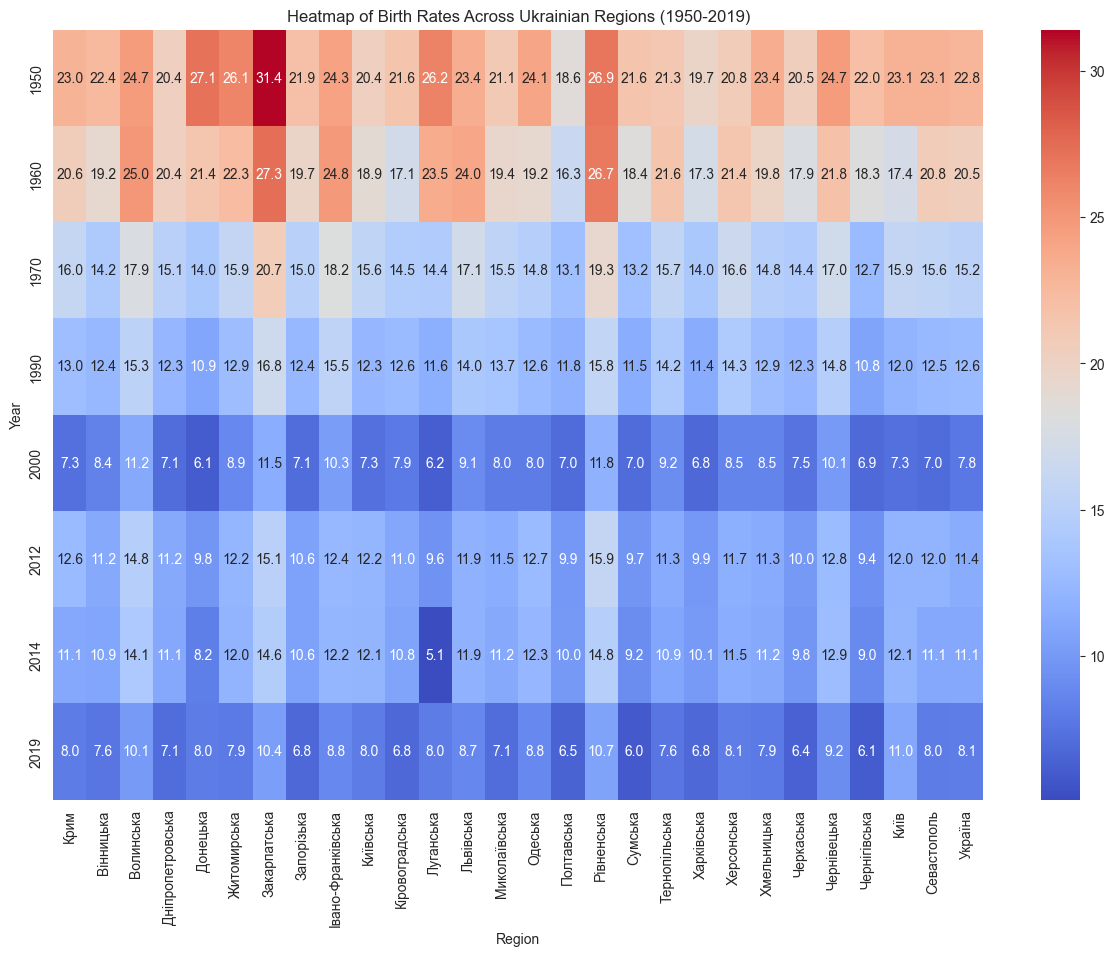

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Birth Rates Across Ukrainian Regions (1950-2019)')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()

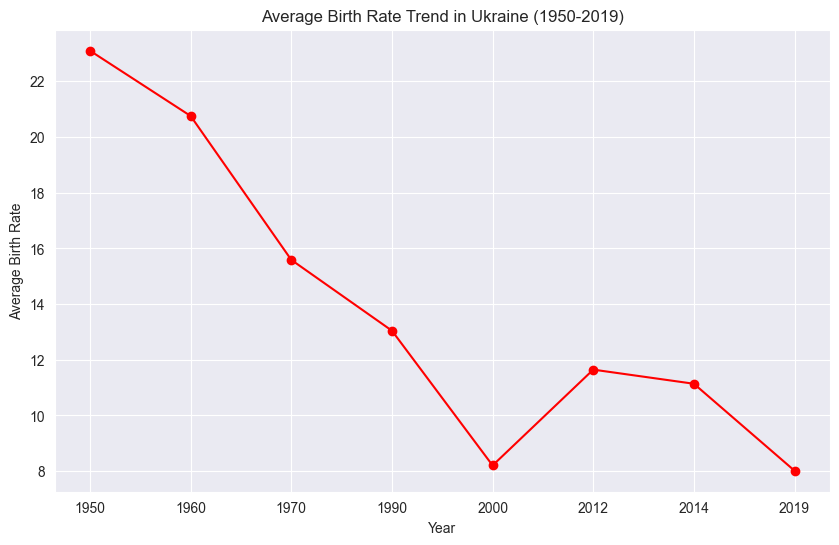

In [34]:
mean_birth_rates = numeric_df.mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_birth_rates.index, mean_birth_rates.values, marker='o', linestyle='-', color='r')
plt.title('Average Birth Rate Trend in Ukraine (1950-2019)')
plt.xlabel('Year')
plt.ylabel('Average Birth Rate')
plt.grid(True)
plt.show()